## Introduction 

This report will follow numerial methods for different types of problems. Formulae used for these solutions are programmed into python in the form of function, all of which are included in the body of the report for clarity's sake. Numerial solutions will be printed at the end of each block of code. Error for each solution is included where it is applicable, calculated using the "error" function located below. The method for calculating true values is dicussed in each problem, again, where applicable. 

In [7]:
##All the import statements to make this easier 
import math 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('ggplot')
%matplotlib inline

In [4]:
##Basic error finding function
def error(x,x_true):
    return float(abs(x_true-x)/x_true)

## Question 1
### Finding the roots of equations Bisection and Newton's Method 

Both the bisection and Newton's method are used to find the roots of a given equation. In order to solve this equation, there needs to be an intial guess at the roots. This can be done graphically. 

In [5]:
def f_1(x): 
    return x**5 + 4*x**4 - 7*x**2 - 3*x + 5
def f_1prime(x):
    return 5*x**4 + 16*x**3 - 14*x - 3

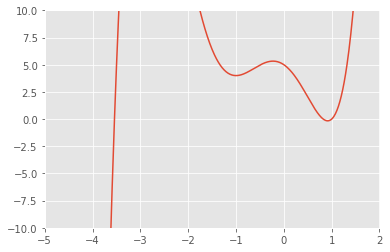

In [8]:
x = np.arange(-5,2,.01)
y = f_1(x)  
plt.plot(x,y)
plt.axis([-5, 2, -10, 10])
plt.figure(figsize=(8,8))

   From this plot we can make an intial guess, and let that be the intial value of the function. We can also see there are 3 roots, so we only need to solve for 3 roots, not a full 5. 
   We then can use a set of algorithms to find a numerial appropximation of the solution. We will first use the bisection method, with is done by take the midway point between endpoints, check the value of this midpoint, and replace one of the endpoints with this new point, and iterate on this. Namely, it is discribed by 
    <center> $p_i = \frac{a+b}{2}$ </center>
    where $p_i$ will replace $a$ if $f(a)$ has the same sign as $f(p_i)$, otherwise it will replace $f(b)$. 
    Another root-finding algorithm is Newton's method, with tends to be more accurate, but requires knowledge of the first derivative of the function. Luckily, the function used here is a 5th degree polynomial so it is a perfect canidate for this method. It works by iterating over the solution, improving it via the formula
   <center> $p_{i} = p_{i-1} - \frac{f(p_{i-1})}{f'(p_{i-1})}$ </center>
   
   In this application, 5 steps of the bisection method are taken, and then 10 steps of Newton's method. The algorithm for this is in the function below. 

In [9]:
def root_finder(f,fprime,a,b):
    print("With intial conditions of a =",a,"and b =",b)
    p_l = []
    for i in range(0,5): ##Computing using Bisection Method
        p = (a+b)/2
        p_l.append(p)
        if np.sign(f(p)) == np.sign(f(a)): 
            a = p
        else: 
            b = p
    print("Result of bisection method:", p)
    for i in range(0,10): ##Computing using Newton's Method 
        p = p_l[-1]-(f(p_l[-1])/fprime(p_l[-1]))
        p_l.append(p)
    print("Result of the Newton's Method:", p)

In [10]:
root_finder(f_1,f_1prime,-4,-3)
print("")
root_finder(f_1,f_1prime,0,.85)
print("")
root_finder(f_1,f_1prime,.9,2)

With intial conditions of a = -4 and b = -3
Result of bisection method: -3.53125
Result of the Newton's Method: -3.541127023564078

With intial conditions of a = 0 and b = 0.85
Result of bisection method: 0.8234375
Result of the Newton's Method: 0.8237175498641635

With intial conditions of a = 0.9 and b = 2
Result of bisection method: 1.003125
Result of the Newton's Method: 1.0


## Question 2 
### Natural Cubic Splice Interpolation 

Cubic Splice is a function fitting method. It interpolates the data to be fit to a third degree polynomial, making it smooth and integrable. The general form of the equation follows: 
<center> $S_j(x) = a_j +b_j(x-x_j)+c_j(x-x_j)^2+d_j(x-x_j)^3$ </center>
Where $S_j$ fits the jth subinterval. 
    There are different sets of boundary conditions, this case is using natural boundary conditions, meaning $S''(x_0)=S''(x_n)=0$. This results in the set of equations below:
    <center> $h_j = x_{j+1}-x_j$ </center>
    <center> $a_j = f(x_j)$ </center>
    <center> $b_{j}=\frac{(a_{j+1}-a_j)}{h_j}+h_j(c_j+c_{j+1})$ </center>
    <center> $c_{j+1}=c_j+3d_jh_j $ </center>
    <center> $d_j = \frac{(c_{j+1}-c_j)}{3h_j}$ </center>
    
These equations are a mess to solve. Luckily these can be used to produce a matrix and vectors, **A**, **b**, and **x**, where **b** and **x** are the coeffients $b_j, c_j$. Then $d_j$ can be solved with the equation above.  
A is given by 
<center>
 **A** = $\begin{bmatrix}
    1 & 0 & 0 & \dots  & 0 \\
    h_0 & 2(h_0 + h_1) & h_1 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  & 1
\end{bmatrix}$
  
 **b** = $\begin{bmatrix}
    0  \\
    \frac{3}{h_1}(a_2-a_1) - \frac{3}{h_1}(a_1-a_0)\\
    \vdots  \\
    \frac{3}{h_{n-1}}(a_n-a_{n-1}) - \frac{3}{h_{n-2}}(a_{n-1}-a_{n-2}) \\
    0 
\end{bmatrix}$
    </center>
    

Using the dataset (-1,1), (0,-1), (1,5) and (4,4): 
<center>
 $\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    1 & 2 & 1 & 0 \\
    0 & 1 & 8 & 3 \\
    0 & 0 & 0 & 1
\end{bmatrix}$

   $\begin{bmatrix}
    c_0  \\
    c_1 \\
    c_2 \\
    c_3
\end{bmatrix}$
  =
 $\begin{bmatrix}
    0  \\
    24 \\
    -19 \\
    0 
\end{bmatrix}$

    </center>
    
This system of equations is solved in the cell below. 

In [34]:
A = np.array([[1,0,0,0], [1,2,1,0],[0,1,8,3],[0,0,0,1]])
h_ar = np.array([1,1,3])
xj_ar = np.array([-1,0,1])

a_ar = np.array([1,-1,5,4])
b_ar = np.array([0,24,-19,0])
c_ar = np.linalg.solve(A, b_ar) ##Function solver linalg
d_ar = np.array([0,0,0]) ##Initalize to 0 

for i in range(3): 
    d_ar[i]=(c_ar[i+1]-c_ar[i])/(3*h_ar[i])

In [18]:
def cube_call(x,i):
    return a_ar[i]+(b_ar[i]*(x-xj_ar[i]))+(c_ar[i]*(x-xj_ar[i])**2)+(d_ar[i]*(x-xj_ar[i])**3)

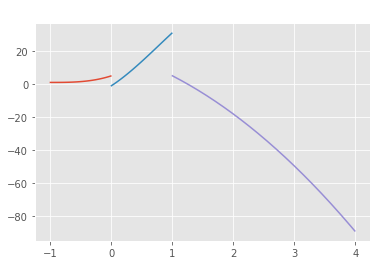

In [35]:
x = [np.arange(-1,0,.01), np.arange(0,1,.01),np.arange(1,4,.01)]
for i in range(0,3): 
    plt.plot(x[i],cube_call(x[i],i))
plt.title("Cubic Splice of 4 Points")
plt.show()

## Question 3 
### Numerial values of integrals 
There are many methods for computing the exact values of integrals, and this section will dicuss two of them; composite Simpson's rule and composite Gaussian Quadrature. The 'composite' part of this implies that the area the integral is over is divided into intervals. 
In this case, the function to integrate is 
<center> $f(x) = 2x\sin{x}$ over the area $[0,\pi]$ </center>
To reach an error of $10^{6}$, smaller and smaller intevrals will be added, denoted by $\frac{\pi}{2^{k}}$, where k it iteratively larger. 

We know the symbolic solution of the integral is $F(x) =  2\sin{x} - 2x\cos{x} + C$, so we can take the true solution by using the fundemental theorm of calculus, and letting the truncation error be small enough to negelect in this case. 

#### Guassian Quadrature 
Composite Guassian Quadrature works by relying on the roots and coeffients of Lagendre polynomials, and summing over these roots and coeffients. This works by approximating the function as a Legendre polynomial, and passing the known solutions of those polynomials to the function. The fomula for this method is denoted by
<center> $\int^b_af(x)dx = \Sigma_i^n c_{n,i}f(r_{n,i}) $ </center>
Where $c_{n,i}$ is the coeffient of the Lagendre polynomial, and $r_{n,i}$ is the root. 

#### Simpson's Rule 
Composite Simpson's rule is an iterative method that subdivides an area of an integral and sums each of those subdivisions, approximating the value of F(x) over that interval with a second degree polynomial. This results in the fomula 
<center> $\int_{a}^{b} f(x)dx = \frac{h}{3}[f(a)-f(b)+2\Sigma^{n/2-1}f(x_{2j})+4\Sigma^{n/2}f(x_{2j-1})]$ </center>
Where $x_{2j}$ and $x_{2j-1}$ denote even and odd terms, respectively.

In [36]:
x_true = 2*math.sin(math.pi) - 2*math.pi*math.cos(math.pi)
def f_3(x):
    return 2*x*math.sin(x)

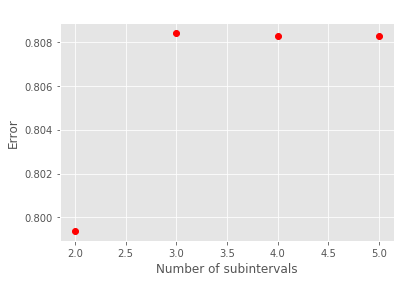

Solution of Guassian Quadrature with 5 terms: 1.2046743019751536 with an error of 0.8082701300248758


In [37]:
##Numerial solutions of Guassian, values pulled from table 4.12 of the text. 
F_n2 = f_3(.5773502)+f_3(-.5773502)
F_n3 = .5555555*f_3(.7745967)+.8888888*f_3(0)+.5555555*f_3(-.7745967)
F_n4 = .3478548*f_3(.8611136)+.6521451*f_3(.3399810)+.6521451*f_3(-.3399810)+.3478548*f_3(-.8611136)
F_n5 = .2369268*f_3(.9061798)+.4786286*f_3(.5384693)+.5688889*f_3(0)+.2369268*f_3(-.9061798)+.4786286*f_3(-.5384693)

e_lst = [error(F_n2,x_true),error(F_n3,x_true),error(F_n4,x_true),error(F_n5,x_true)]

plt.plot([2,3,4,5],e_lst,'ro')
plt.title("Rate of Convergence of Guassian Quadrature")
plt.xlabel("Number of subintervals")
plt.ylabel("Error")
plt.figure(figsize=(8,8))
plt.show()

print("Solution of Guassian Quadrature with 5 terms:",F_n5, "with an error of",e_lst[-1])

In [38]:
##Function for Simpson's 
def simpson_rule(f,h,a,b):
    N = (b-a)/h
    K_1 = (f(a)+f(b))
    K_2 = 0
    K_3 = 0
    for i in range(0,int(N)): 
        if i%2==0: 
            K_2+=f(a+i*h) 
        else: 
            K_3+=f(a+i*h)
    return h/3*(K_1 + 2*K_2 +4*K_3)

In [39]:
k=1
e=100
e_lst=[] ##Storing the values to plot
h_lst=[]
while e>float(10**(-6)): 
    h = math.pi/(2**k)
    calc = simpson_rule(f_3,h,0,math.pi)
    e = error(calc,x_true)
    k+=1
    e_lst.append(math.log(e))
    h_lst.append((math.pi)/h)
print("Solution of", calc,"achieved in", k-1,"iterations, with an error of",e)

Solution of 6.283188553605344 achieved in 5 iterations, with an error of 5.166847066953519e-07


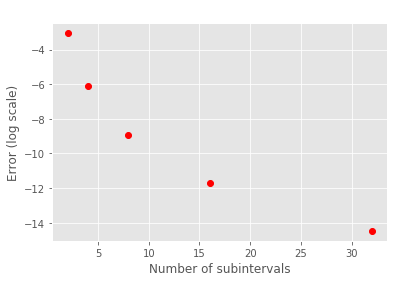

In [40]:
plt.plot(h_lst,e_lst,'ro')
plt.title("Rate of Convergence of Simpson's Rule")
plt.xlabel("Number of subintervals")
plt.ylabel("Error (log scale)")
plt.figure(figsize=(8,8))
plt.show()

## Question 4
### 4th Order Runge-Kutta Method
The fourth Order Runge-Katta Method is an multistep method, which can be used with a system of equation. Because of this, it can be adapted to solve a nth ordered differencial equation. In the case below, it is being used to solve the system: 
<center> $\frac{dx}{dt}=-3y$</center>
<center> $\frac{dy}{dt}=\frac{1}{3}x^2$ </center>

Because $\frac{dx}{dt}$ and $\frac{dy}{dt}$ are only dependent on one variable each, the form of the Runge-Kutta Method is given by: 
<center> $K_{1,1} = h f_i(w_{2,j})$ </center>
<center> $K_{2,1} = h f_i(w_{2,j}+\frac{1}{2}K_{1,2})$ </center>
<center> $K_{3,1} = h f_i(w_{2,j}+\frac{1}{2}K_{2,2})$ </center>
<center> $K_{4,1} = h f_i(w_{2,j}+K_{3,2})$ </center>

<center> $w_{j,1}=w_{j-1,1}+\frac{1}{6}(K_{1,1}+2K_{2,1}+2K_{3,1}+K_{4,1})$ </center>

In [68]:
def f_4_1(y):
    return -3*y
def f_4_2(x):
    return (1/3)*x*x

def KR_2D(f_1,f_2,x_0,y_0,h,N):
    x=[x_0]
    y=[y_0]
    
    for i in range(0,N-1):
        K1_x=h*f_x(y[i])
        K1_y=h*f_(x[i])
        
        K2_x=h*f_1(y[i]+(1/2)*K1_y)
        K2_y=h*f_2(x[i]+(1/2)*K1_x)
            
        K3_x=h*f_1(y[i]+(1/2)*K2_y)
        K3_y=h*f_2(x[i]+(1/2)*K2_x)
        
        K4_x=h*f_1(y[i]+K3_y)
        K4_y=h*f_2(x[i]+K3_x)
        
        x_s = x[i]+(1/6)*(K1_x+2*K2_x+2*K3_x+K4_x)
        y_s = y[i]+(1/6)*(K1_y+2*K2_y+2*K3_y+K4_y)
        
        if (x_s != -math.inf) and (y_s != math.inf):
            x.append(x_s)
            y.append(y_s)
        else: 
            break 
    return x,y

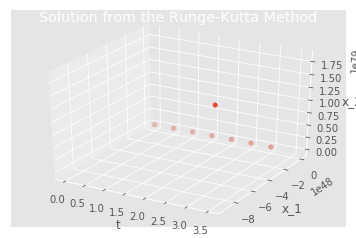

In [86]:
a,b,N = 0,4,8
h = (b-a)/N

x_lst,y_lst = KR_2D(f_4_1,f_4_2,0,1,h,N)
t = np.arange(a,b,(b-a)/len(x_lst))

ax = plt.axes(projection='3d')
plt.title("Solution from the Runge-Kutta Method")
plt.xlabel('t')
plt.ylabel('x_1')
ax.set_zlabel('x_2')
ax.scatter3D(t, x_lst, y_lst);

While $N=8$ is very small, producing a very corse mesh, any larger order solutions diverge to positive infinity and negative infinity. This is documented in the graph below, which shows the number of terms the solution has before it diverages. 

Text(0,0.5,'Terms')

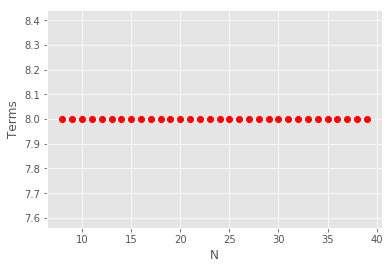

In [90]:
term_size=[]
t = []
for N in range(8,40):
    x_lst,y_lst = KR_2D(f_4_1,f_4_2,0,1,h,N)
    term_size.append(len(x_lst))
    t.append(N)
    
plt.plot(t,term_size, 'ro')
plt.xlabel("N")
plt.ylabel("Terms")